In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import pmdarima as pm
import random
import importlib
import mpt_functions as mpt
importlib.reload(mpt)
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import grangercausalitytests

In [2]:
path = "C:/Users/bilge/Downloads/MetroPT3(AirCompressor).csv"
df = mpt.get_the_data_and_convert_datetime(path)
df = mpt.drop_a_column(df, "Unnamed: 0")
df.head()

,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses
0,2020-02-01 00:00:00,-0.012,9.358,9.340,-0.024,9.358,53.600,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
1,2020-02-01 00:00:10,-0.014,9.348,9.332,-0.022,9.348,53.675,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
2,2020-02-01 00:00:19,-0.012,9.338,9.322,-0.022,9.338,53.600,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
3,2020-02-01 00:00:29,-0.012,9.328,9.312,-0.022,9.328,53.425,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
4,2020-02-01 00:00:39,-0.012,9.318,9.302,-0.022,9.318,53.475,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0


In [3]:
df = mpt.aggregate_as_a_minute(df)
df

,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses
0,2020-02-01 00:00:00,-0.012286,9.327429,9.311143,-0.022857,9.328000,53.521429,0.040357,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
1,2020-02-01 00:01:00,-0.013000,9.260000,9.243333,-0.023333,9.259667,53.420833,0.040000,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
2,2020-02-01 00:02:00,-0.012667,9.198333,9.182000,-0.022333,9.199000,53.325000,0.040000,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
3,2020-02-01 00:03:00,-0.012333,9.136667,9.120667,-0.022667,9.136667,53.200000,0.040000,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
4,2020-02-01 00:04:00,-0.013000,9.075667,9.060000,-0.023000,9.075667,53.129167,0.040000,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306955,2020-09-01 03:55:00,-0.012000,9.247667,9.235000,-0.021000,9.249333,62.658333,0.045000,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
306956,2020-09-01 03:56:00,-0.012667,9.158333,9.145333,-0.022000,9.160333,61.304167,0.044583,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
306957,2020-09-01 03:57:00,-0.011667,9.070667,9.056667,-0.021667,9.072333,60.620833,0.044583,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
306958,2020-09-01 03:58:00,-0.012000,8.982000,8.967667,-0.021333,8.984000,60.083333,0.044167,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0


In [4]:
# Failure Intervals

f1_start = "2020-04-18 00:00:00"
f1_finish = "2020-04-18 23:59:00"
f2_start = "2020-05-29 23:30:00"
f2_finish = "2020-05-30 06:00:00"
f3_start = "2020-06-05 10:00:00"
f3_finish = "2020-06-07 14:30:00"
f4_start = "2020-07-15 14:30:00"
f4_finish = "2020-07-15 19:00:00"

In [5]:
# df2 is the new version of df1 with "condition" column added

df2 = df.assign(condition=0)
df2.head()

,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses,condition
0,2020-02-01 00:00:00,-0.012286,9.327429,9.311143,-0.022857,9.328000,53.521429,0.040357,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0
1,2020-02-01 00:01:00,-0.013000,9.260000,9.243333,-0.023333,9.259667,53.420833,0.040000,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0
2,2020-02-01 00:02:00,-0.012667,9.198333,9.182000,-0.022333,9.199000,53.325000,0.040000,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0
3,2020-02-01 00:03:00,-0.012333,9.136667,9.120667,-0.022667,9.136667,53.200000,0.040000,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0
4,2020-02-01 00:04:00,-0.013000,9.075667,9.060000,-0.023000,9.075667,53.129167,0.040000,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0


0    301707
1      5253
Name: condition, dtype: int64


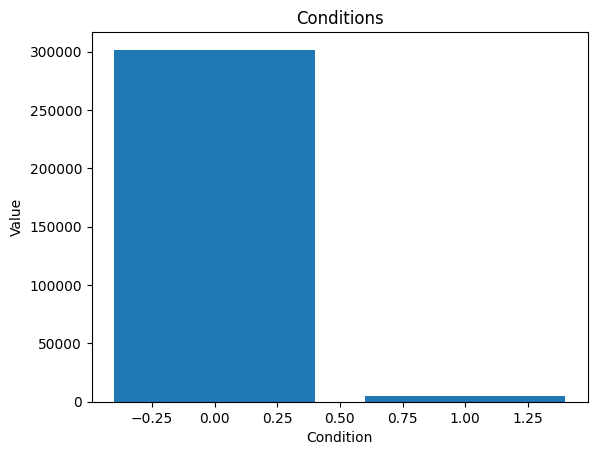

In [6]:
df2a = mpt.change_the_values_by_applying_a_time_filter(df2, f1_start, f1_finish, "condition", 1)
df2b = mpt.change_the_values_by_applying_a_time_filter(df2a, f2_start, f2_finish, "condition", 1)
df2c = mpt.change_the_values_by_applying_a_time_filter(df2b, f3_start, f3_finish, "condition", 1)
df2 = mpt.change_the_values_by_applying_a_time_filter(df2c, f4_start, f4_finish, "condition", 1)

print(df2["condition"].value_counts())


plt.bar([0, 1], df2["condition"].value_counts())
plt.title('Conditions')
plt.xlabel('Condition')
plt.ylabel('Value')
plt.show()

In [7]:
print(df2.isna().sum())  # Count NaN values
print((df2 == float('inf')).sum())  # Count positive infinity
print((df2 == float('-inf')).sum())  # Count negative infinity

timestamp              0
TP2                54240
TP3                54240
H1                 54240
DV_pressure        54240
Reservoirs         54240
Oil_temperature    54240
Motor_current      54240
COMP               54240
DV_eletric         54240
Towers             54240
MPG                54240
LPS                54240
Pressure_switch    54240
Oil_level          54240
Caudal_impulses    54240
condition              0
dtype: int64
timestamp          0
TP2                0
TP3                0
H1                 0
DV_pressure        0
Reservoirs         0
Oil_temperature    0
Motor_current      0
COMP               0
DV_eletric         0
Towers             0
MPG                0
LPS                0
Pressure_switch    0
Oil_level          0
Caudal_impulses    0
condition          0
dtype: int64
timestamp          0
TP2                0
TP3                0
H1                 0
DV_pressure        0
Reservoirs         0
Oil_temperature    0
Motor_current      0
COMP               0
DV_

In [8]:
# Drop rows with NaN values
df2 = df2.dropna()

In [9]:
df_day1 = mpt.filter_a_day("2020-04-17",df2)
df_day1

,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses,condition
0,2020-04-17 00:00:00,-0.013000,9.307333,9.296000,-0.023667,9.306333,60.470833,0.042500,1.00,0.0,1.00,1.00,0.0,1.00,1.00,1.00,0
1,2020-04-17 00:01:00,-0.013000,9.223667,9.212333,-0.023333,9.222333,59.300000,0.042083,1.00,0.0,1.00,1.00,0.0,1.00,1.00,1.00,0
2,2020-04-17 00:02:00,-0.013667,9.142000,9.129667,-0.023333,9.140667,58.604167,0.042500,1.00,0.0,1.00,1.00,0.0,1.00,1.00,1.00,0
3,2020-04-17 00:03:00,-0.013667,9.062000,9.050000,-0.023667,9.061667,58.075000,0.042500,1.00,0.0,1.00,1.00,0.0,1.00,1.00,1.00,0
4,2020-04-17 00:04:00,-0.014000,8.981333,8.969333,-0.024667,8.981667,57.554167,0.041667,1.00,0.0,1.00,1.00,0.0,1.00,1.00,1.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1193,2020-04-17 23:55:00,-0.018000,8.248000,8.238000,-0.024000,8.248000,49.450000,0.040000,0.80,0.0,0.80,0.80,0.0,0.80,0.80,0.80,0
1194,2020-04-17 23:56:00,-0.018000,8.248000,8.238000,-0.024000,8.248000,49.450000,0.040000,0.80,0.0,0.80,0.80,0.0,0.80,0.80,0.80,0
1195,2020-04-17 23:57:00,-0.018000,8.248000,8.238000,-0.024000,8.248000,49.450000,0.040000,0.75,0.0,0.75,0.75,0.0,0.75,0.75,0.75,0
1196,2020-04-17 23:58:00,-0.018000,8.248000,8.238000,-0.024000,8.248000,49.450000,0.040000,0.80,0.0,0.80,0.80,0.0,0.80,0.80,0.80,0


In [32]:
df_day2 = mpt.filter_a_day("2020-07-20",df2)
df_day2

,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses,condition
0,2020-07-20 00:00:00,-0.013333,8.421333,8.408000,-0.022000,8.421667,59.566667,0.042500,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0
1,2020-07-20 00:01:00,-0.013000,8.330000,8.318000,-0.022000,8.332000,59.145833,0.042500,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0
2,2020-07-20 00:02:00,-0.013000,8.242000,8.230000,-0.022000,8.242667,58.816667,0.042500,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0
3,2020-07-20 00:03:00,-0.012667,8.154333,8.142667,-0.022000,8.156000,58.491667,0.042500,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0
4,2020-07-20 00:04:00,2.672667,8.103333,4.057667,-0.021667,8.105000,58.125000,2.638333,0.5,0.5,1.0,0.5,0.0,1.0,1.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,2020-07-20 23:55:00,-0.011667,9.655667,9.643333,-0.019667,9.657000,69.808333,3.723333,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0
1432,2020-07-20 23:56:00,-0.010667,9.548333,9.535000,-0.019667,9.549333,68.462500,3.707083,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0
1433,2020-07-20 23:57:00,-0.010667,9.444000,9.431333,-0.019333,9.445000,67.108333,3.685833,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0
1434,2020-07-20 23:58:00,-0.010857,9.334000,9.322286,-0.018571,9.335714,66.764286,3.705357,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0


In [33]:
variables = ['TP2', 'TP3', 'H1', 'DV_pressure', 'Reservoirs', 'Oil_temperature', 'Motor_current', 'COMP', 
             'DV_eletric', 'Towers', 'MPG', 'LPS', 'Pressure_switch', 'Oil_level', 'Caudal_impulses']

# Granger causality test for each variable with 'Condition' as the dependent variable
results = {}
for var in variables:
    test_result = grangercausalitytests(df2[['condition', var]], maxlag=5, verbose=True)
    results[var] = test_result


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=19.9859 , p=0.0000  , df_denom=252716, df_num=1
ssr based chi2 test:   chi2=19.9861 , p=0.0000  , df=1
likelihood ratio test: chi2=19.9853 , p=0.0000  , df=1
parameter F test:         F=19.9859 , p=0.0000  , df_denom=252716, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=11.7828 , p=0.0000  , df_denom=252713, df_num=2
ssr based chi2 test:   chi2=23.5660 , p=0.0000  , df=2
likelihood ratio test: chi2=23.5649 , p=0.0000  , df=2
parameter F test:         F=11.7828 , p=0.0000  , df_denom=252713, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=10.2551 , p=0.0000  , df_denom=252710, df_num=3
ssr based chi2 test:   chi2=30.7662 , p=0.0000  , df=3
likelihood ratio test: chi2=30.7643 , p=0.0000  , df=3
parameter F test:         F=10.2551 , p=0.0000  , df_denom=252710, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=8.

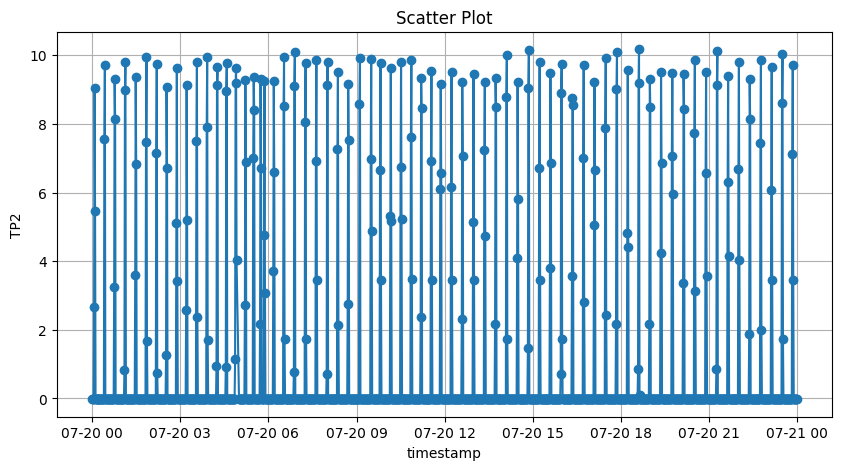

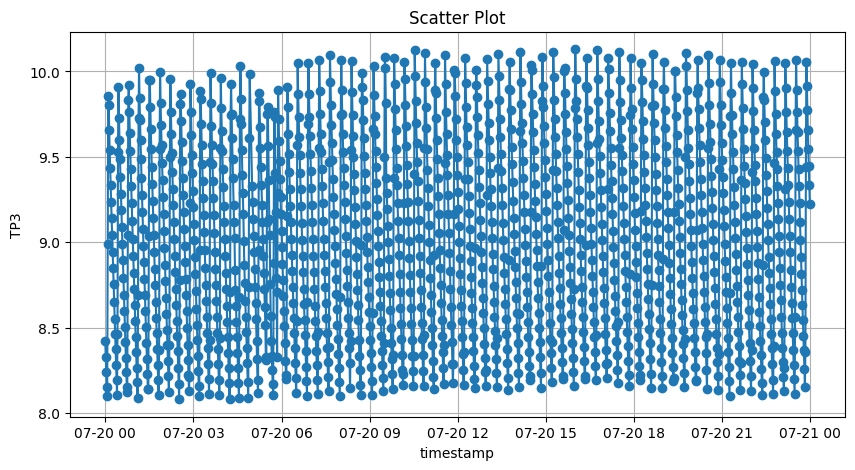

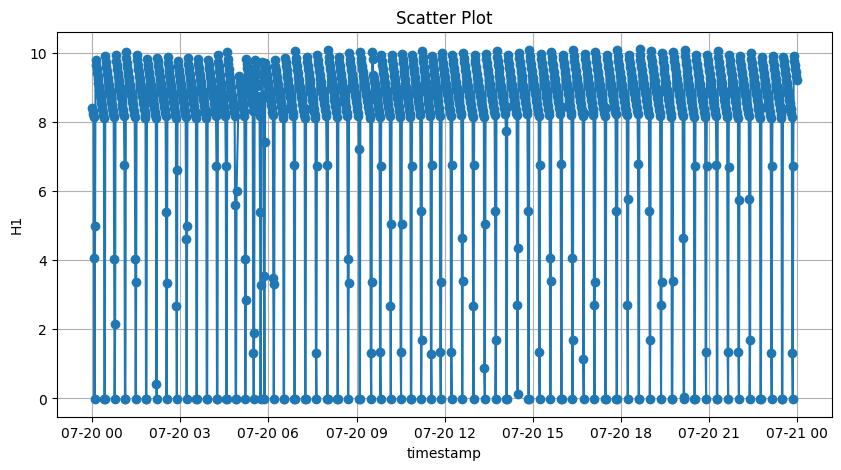

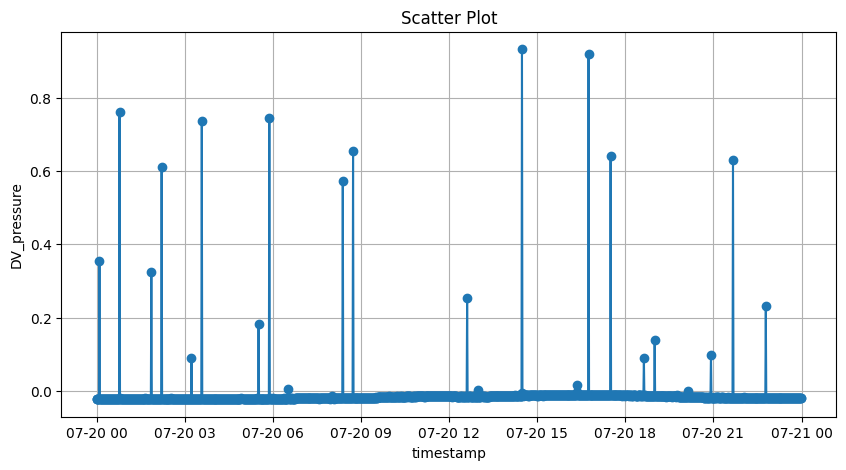

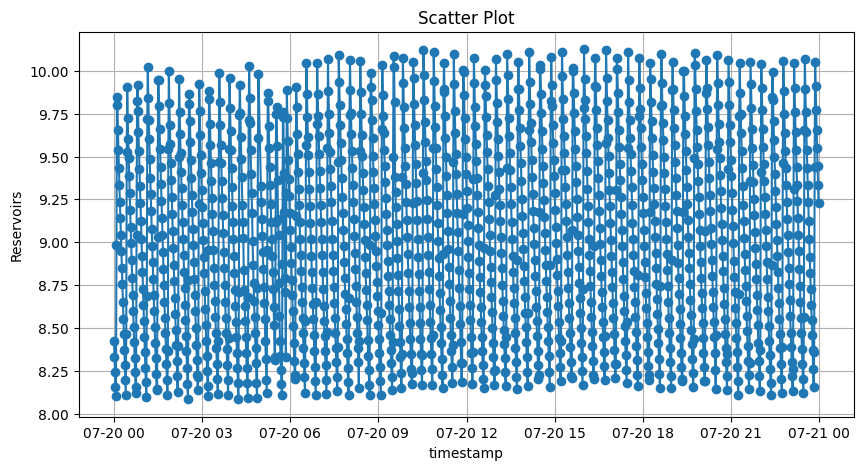

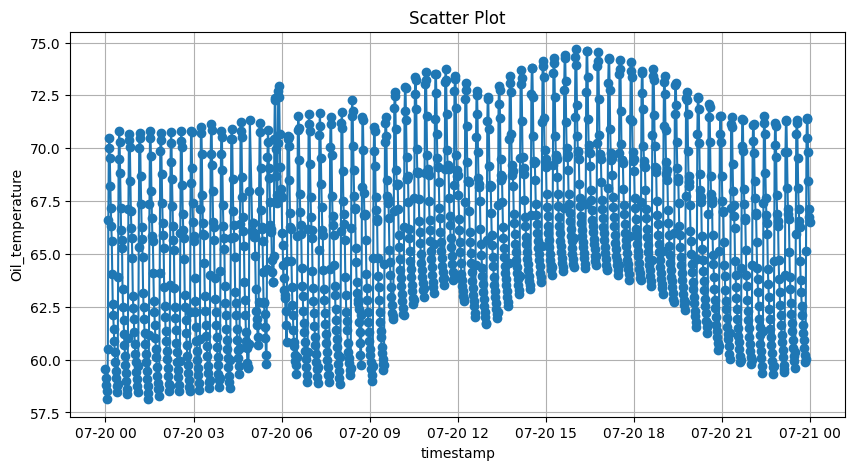

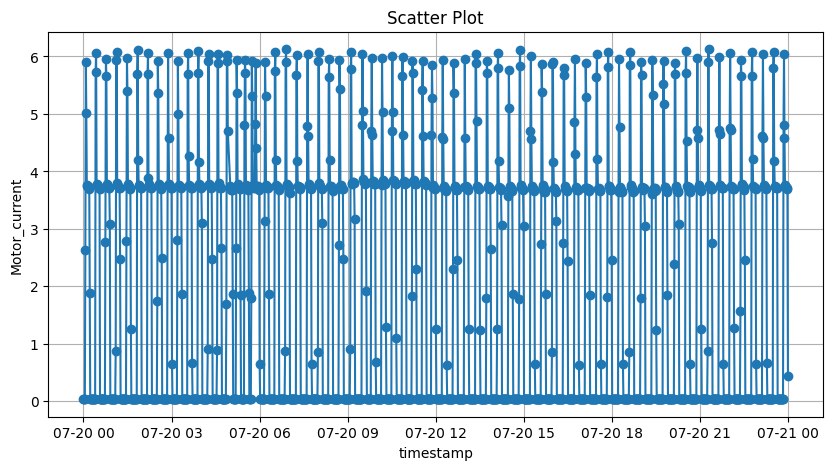

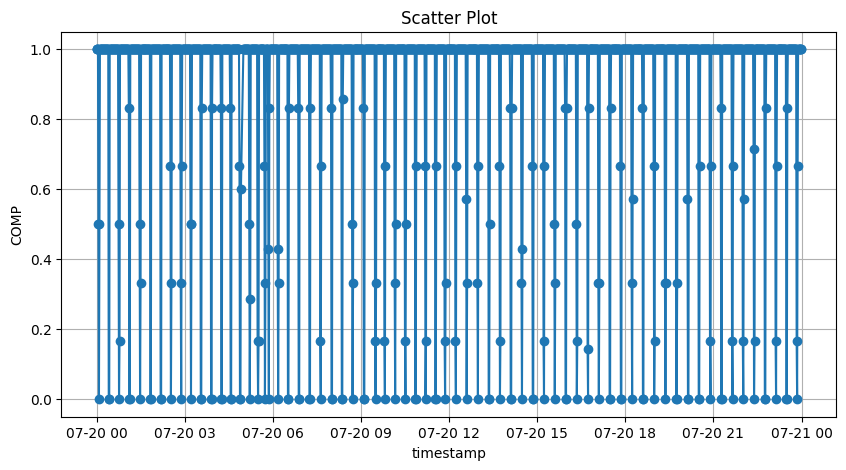

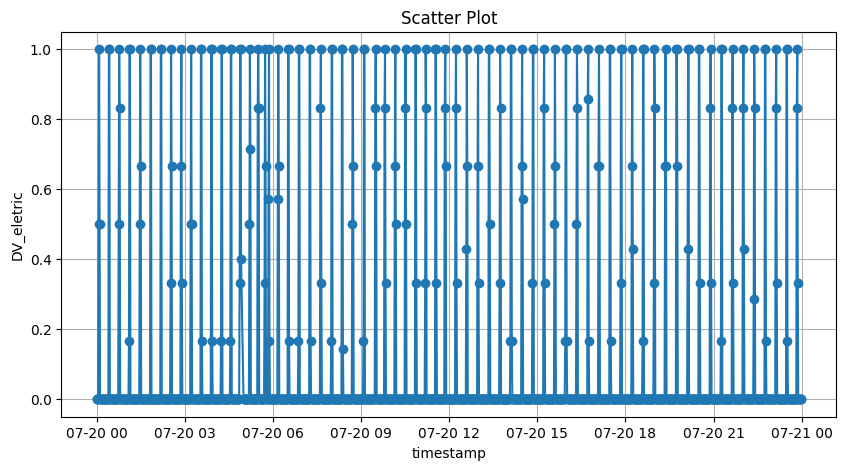

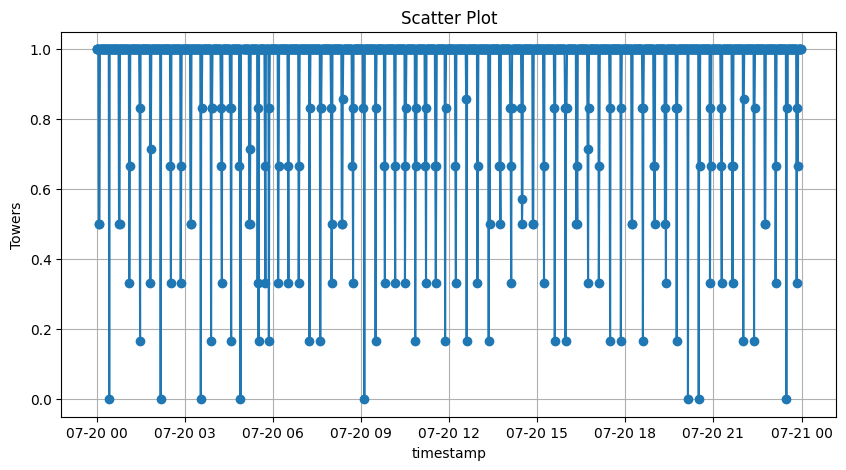

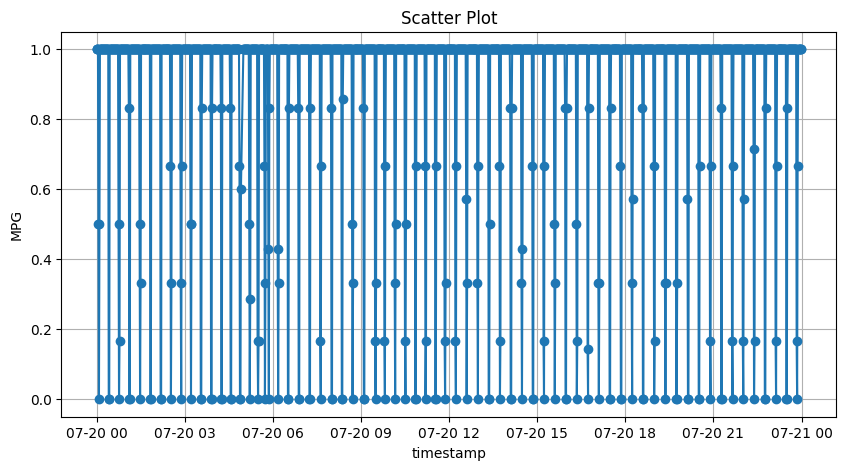

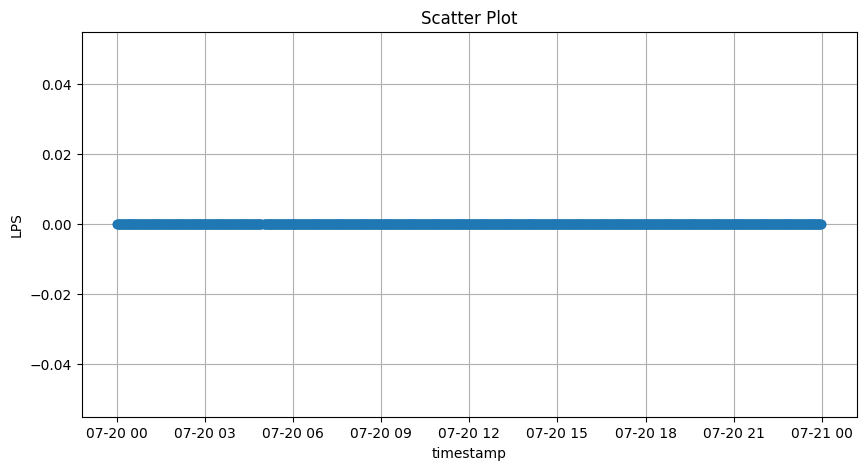

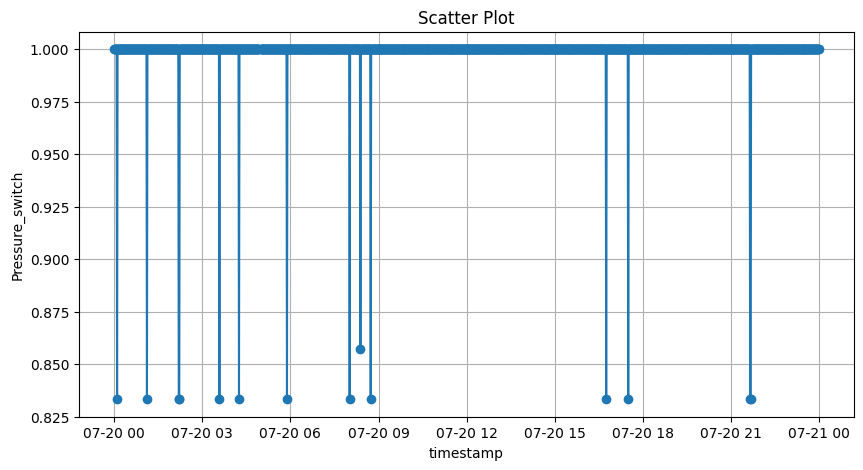

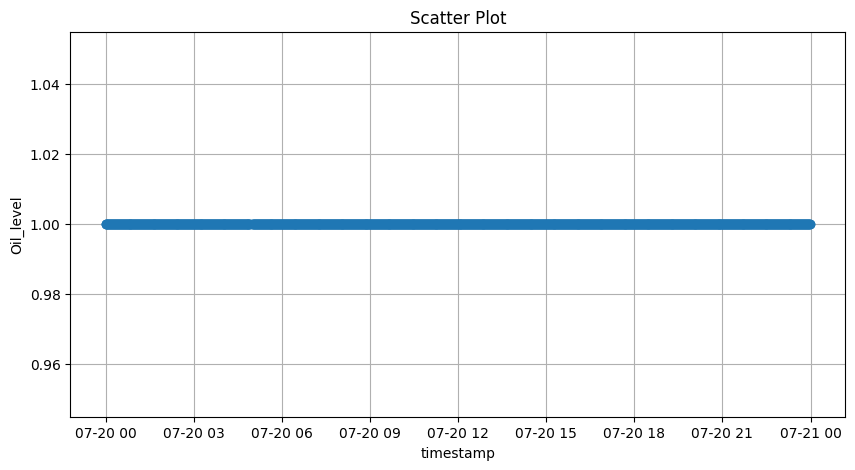

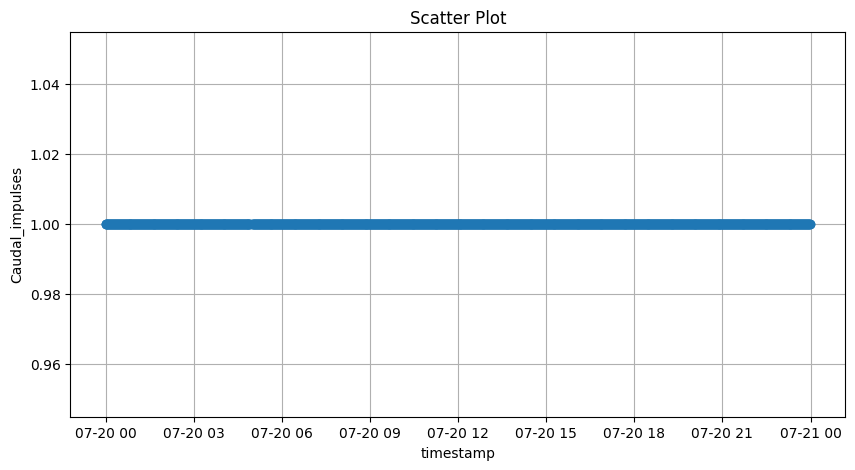

In [34]:
for column in variables:
    mpt.plot_columns(df_day2, "timestamp", column)

In [13]:
import pandas as pd
from statsmodels.tsa.stattools import grangercausalitytests

def check_exogenous_granger(df, target_column, exogenous_columns, max_lag=5, significance_level=0.05):
    for column in exogenous_columns:
        if column in df.columns:
            # Perform Granger Causality test
            test_result = grangercausalitytests(df[[target_column, column]], max_lag, verbose=False)
            
            # Extract the p-values from the test results
            p_values = [test_result[lag][0]['ssr_chi2test'][1] for lag in range(1, max_lag+1)]
            
            # If the p-value is greater than the significance level, the variable is exogenous
            if all(p > significance_level for p in p_values):
                print(f"{column} is considered exogenous with respect to {target_column}.")
            else:
                print(f"{column} Granger causes {target_column}.")
        else:
            print(f"{column} is not present in the dataset.")

target_column = 'condition'  
check_exogenous_granger(df2, target_column, variables)

TP2 Granger causes condition.
TP3 is considered exogenous with respect to condition.
H1 Granger causes condition.
DV_pressure Granger causes condition.
Reservoirs is considered exogenous with respect to condition.
Oil_temperature Granger causes condition.
Motor_current Granger causes condition.
COMP Granger causes condition.
DV_eletric Granger causes condition.
Towers Granger causes condition.
MPG Granger causes condition.
LPS is considered exogenous with respect to condition.
Pressure_switch Granger causes condition.
Oil_level Granger causes condition.
Caudal_impulses Granger causes condition.


In [14]:
check_exogenous_granger(df_day2, target_column, ['TP2', 'TP3', 'H1', 'DV_pressure', 'Reservoirs', 'Oil_temperature', 'Motor_current', 'COMP', 
             'DV_eletric', 'Towers', 'MPG', 'Pressure_switch'])

TP2 Granger causes condition.
TP3 is considered exogenous with respect to condition.
H1 Granger causes condition.
DV_pressure is considered exogenous with respect to condition.
Reservoirs is considered exogenous with respect to condition.
Oil_temperature Granger causes condition.
Motor_current Granger causes condition.
COMP Granger causes condition.
DV_eletric Granger causes condition.
Towers Granger causes condition.
MPG Granger causes condition.
Pressure_switch is considered exogenous with respect to condition.


In [15]:
df2_clean = df2.drop(columns=['timestamp']).apply(pd.to_numeric, errors='coerce').dropna()

In [16]:
from statsmodels.tsa.api import VAR

In [17]:
model = VAR(df2_clean)

d:\Anaconda\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [18]:
model_fitted = model.fit(20)
print(model_fitted.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 06, Apr, 2025
Time:                     12:51:40
--------------------------------------------------------------------
No. of Equations:         16.0000    BIC:                   -105.619
Nobs:                     252700.    HQIC:                  -105.769
Log likelihood:       7.63983e+06    FPE:                1.09192e-46
AIC:                     -105.831    Det(Omega_mle):     1.06997e-46
--------------------------------------------------------------------
Results for equation TP2
                         coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------------
const                       9.377408         0.167212           56.081           0.000
L1.TP2                     -1.153080         0.012938          -89.125           0.000
L1.TP3                   -111.425941  

In [19]:
forecast = model_fitted.forecast(df2_clean.values[-20:], steps=5)
print(pd.DataFrame(forecast, columns=df2_clean.columns))

        TP2       TP3        H1  DV_pressure  Reservoirs  Oil_temperature  \
0  0.061963  8.816961  8.730169    -0.023616    8.818435        59.166229   
1  0.103700  8.756343  8.620007    -0.024994    8.757850        58.765410   
2  0.243725  8.702592  8.432241    -0.026186    8.704085        58.498773   
3  0.406841  8.667001  8.228303    -0.027208    8.668442        58.387545   
4  0.678774  8.659339  7.941487    -0.024022    8.660656        58.380529   

   Motor_current      COMP  DV_eletric    Towers       MPG       LPS  \
0       0.056817  0.992070    0.007850  0.991503  0.991900 -0.001079   
1       0.173977  0.985628    0.013948  0.991566  0.985328 -0.000841   
2       0.300603  0.971294    0.028929  0.986551  0.970772 -0.001367   
3       0.485018  0.951283    0.048593  0.974547  0.951034 -0.000993   
4       0.729232  0.920960    0.078895  0.962381  0.920836 -0.001572   

   Pressure_switch  Oil_level  Caudal_impulses  condition  
0         1.000548   0.999279         0.9994

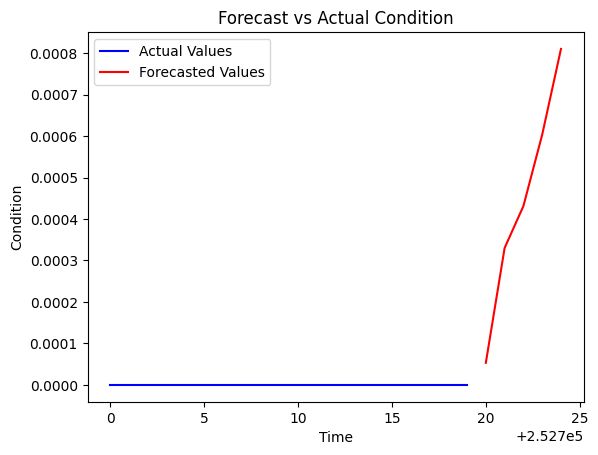

In [20]:
forecast_df = pd.DataFrame(forecast, columns=df2_clean.columns)

x_actual = range(len(df2_clean) - 20, len(df2_clean)) 
x_forecast = range(len(df2_clean), len(df2_clean) + 5) 

plt.plot(x_actual, df2_clean['condition'].iloc[-20:], label="Actual Values", color='blue')

plt.plot(x_forecast, forecast_df['condition'], label="Forecasted Values", color='red')

plt.xlabel('Time')
plt.ylabel('Condition')
plt.title('Forecast vs Actual Condition')
plt.legend()
plt.show()

In [21]:
print(df2_clean['condition'].iloc[-20:])
print(forecast_df['condition'])

306940    0
306941    0
306942    0
306943    0
306944    0
306945    0
306946    0
306947    0
306948    0
306949    0
306950    0
306951    0
306952    0
306953    0
306954    0
306955    0
306956    0
306957    0
306958    0
306959    0
Name: condition, dtype: int64
0    0.000053
1    0.000330
2    0.000431
3    0.000603
4    0.000810
Name: condition, dtype: float64


In [22]:
def conduct_VAR_for_a_given_day(df, steps=5, max_lags=5, corr_threshold=0.98):
    from statsmodels.tsa.api import VAR
    import numpy as np
    import pandas as pd

    condition_col = df['condition'] if 'condition' in df.columns else None
    df_features = df.drop(columns=["timestamp"], errors="ignore")

    constant_cols = df_features.columns[(df_features.nunique() <= 1) & (df_features.columns != 'condition')]
    df_features = df_features.drop(columns=constant_cols)
    print("Dropped constant columns:", constant_cols.tolist())

    corr_matrix = df_features.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = [column for column in upper.columns if column != 'condition' and any(upper[column] > corr_threshold)]
    df_features = df_features.drop(columns=to_drop)
    print("Dropped highly correlated columns:", to_drop)

    if condition_col is not None and 'condition' not in df_features.columns:
        df_features['condition'] = condition_col

    if len(df_features) < max_lags:
        print(f"Not enough data to select {max_lags} lags. Reducing maxlags to {len(df_features)-1}.")
        max_lags = len(df_features) - 1

    model = VAR(df_features)
    try:
        lag_order = model.select_order(maxlags=max_lags)
        selected_lag = lag_order.aic
        print(f"Selected lag order: {selected_lag}")
    except (np.linalg.LinAlgError, ValueError) as e:
        print("Error during lag selection:", e)
        print("Falling back to lag=1.")
        selected_lag = 1

    try:
        model_fitted = model.fit(selected_lag)
        forecast = model_fitted.forecast(df_features.values[-selected_lag:], steps)
        forecast_df = pd.DataFrame(forecast, columns=df_features.columns)
        return forecast_df
    except Exception as e:
        print("Final model fitting failed:", e)
        return None

In [23]:
def plot_VAR_prediction(forecast, df_clean, column):
    forecast_df = pd.DataFrame(forecast, columns=df_clean.columns)
    x_actual = range(len(df2_clean) - 20, len(df2_clean))
    x_forecast = range(len(df2_clean), len(df2_clean) + 5)
    plt.plot(x_actual, df2_clean[column].iloc[-20:], label="Actual Values", color='blue')
    plt.plot(x_forecast, forecast_df[column], label="Forecasted Values", color='red')
    plt.xlabel('Time')
    plt.ylabel(str(column))
    plt.title('Forecast vs Actual Condition')
    plt.legend()
    plt.show()

In [24]:
forecast_df_day1 = conduct_VAR_for_a_given_day(df_day1)

Dropped constant columns: []
Dropped highly correlated columns: ['Reservoirs', 'DV_eletric', 'MPG', 'Oil_level', 'Caudal_impulses']
Error during lag selection: 11-th leading minor of the array is not positive definite
Falling back to lag=1.


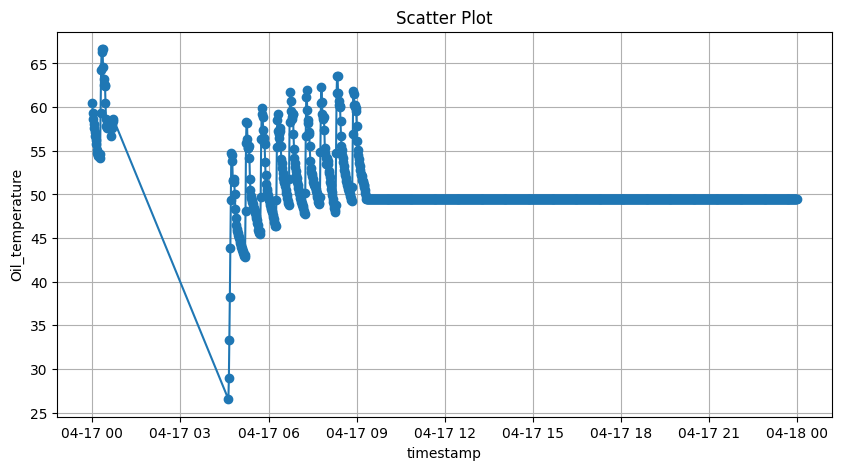

In [25]:
mpt.plot_columns(df_day1, "timestamp", "Oil_temperature")

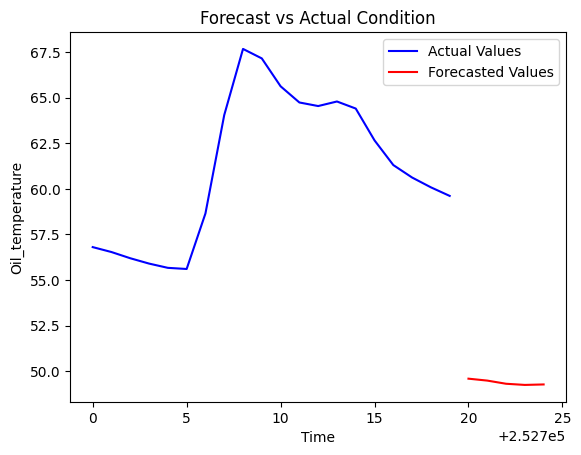

In [26]:
plot_VAR_prediction(forecast_df_day1, df_day1, "Oil_temperature")

In [27]:
print(df2_clean['Oil_temperature'].iloc[-20:])
print(forecast_df_day1['Oil_temperature'])

306940    56.804167
306941    56.533333
306942    56.192857
306943    55.900000
306944    55.666667
306945    55.604167
306946    58.650000
306947    64.045833
306948    67.675000
306949    67.154167
306950    65.625000
306951    64.737500
306952    64.541667
306953    64.791667
306954    64.404167
306955    62.658333
306956    61.304167
306957    60.620833
306958    60.083333
306959    59.612500
Name: Oil_temperature, dtype: float64
0    49.587663
1    49.482306
2    49.308726
3    49.244903
4    49.270925
Name: Oil_temperature, dtype: float64


In [28]:
f4_1hr = "2020-07-15 14:25:00"
f4_1hr_dt = pd.to_datetime(f4_1hr)
df_day1['timestamp'] = pd.to_datetime(df_day1['timestamp'])  # Ensure timestamp column is in datetime format
historical_data = df_day1[df_day1['timestamp'] < f4_1hr_dt]
historical_data.tail(20)

,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses,condition
1178,2020-04-17 23:40:00,-0.018,8.248,8.238,-0.024,8.248,49.45,0.04,0.80,0.0,0.80,0.80,0.0,0.80,0.80,0.80,0
1179,2020-04-17 23:41:00,-0.018,8.248,8.238,-0.024,8.248,49.45,0.04,1.00,0.0,1.00,1.00,0.0,1.00,1.00,1.00,0
1180,2020-04-17 23:42:00,-0.018,8.248,8.238,-0.024,8.248,49.45,0.04,0.60,0.0,0.60,0.60,0.0,0.60,0.60,0.60,0
1181,2020-04-17 23:43:00,-0.018,8.248,8.238,-0.024,8.248,49.45,0.04,0.60,0.0,0.60,0.60,0.0,0.60,0.60,0.60,0
1182,2020-04-17 23:44:00,-0.018,8.248,8.238,-0.024,8.248,49.45,0.04,0.80,0.0,0.80,0.80,0.0,0.80,0.80,0.80,0
1183,2020-04-17 23:45:00,-0.018,8.248,8.238,-0.024,8.248,49.45,0.04,1.00,0.0,1.00,1.00,0.0,1.00,1.00,1.00,0
1184,2020-04-17 23:46:00,-0.018,8.248,8.238,-0.024,8.248,49.45,0.04,0.80,0.0,0.80,0.80,0.0,0.80,0.80,0.80,0
1185,2020-04-17 23:47:00,-0.018,8.248,8.238,-0.024,8.248,49.45,0.04,0.80,0.0,0.80,0.80,0.0,0.80,0.80,0.80,0
1186,2020-04-17 23:48:00,-0.018,8.248,8.238,-0.024,8.248,49.45,0.04,0.80,0.0,0.80,0.80,0.0,0.80,0.80,0.80,0
1187,2020-04-17 23:49:00,-0.018,8.248,8.238,-0.024,8.248,49.45,0.04,0.80,0.0,0.80,0.80,0.0,0.80,0.80,0.80,0


In [29]:
def plot_VAR_prediction_v2(forecast, df_clean):
    forecast_df = pd.DataFrame(forecast, columns=df_clean.columns)
    x_actual = range(len(df2_clean) - 20, len(df2_clean))
    x_forecast = range(len(df2_clean), len(df2_clean) + 5)
    plt.plot(x_actual, df2_clean['condition'].iloc[-20:], label="Actual Values", color='blue')
    plt.plot(x_forecast, forecast_df['condition'], label="Forecasted Values", color='red')
    plt.xlabel('Time')
    plt.ylabel('Condition')
    plt.title('Forecast vs Actual Condition')
    plt.legend()
    plt.show()

In [30]:
forecast = conduct_VAR_for_a_given_day(historical_data, 10)
forecast.shape
forecast.head(20)


Dropped constant columns: []
Dropped highly correlated columns: ['Reservoirs', 'DV_eletric', 'MPG', 'Oil_level', 'Caudal_impulses']
Error during lag selection: 11-th leading minor of the array is not positive definite
Falling back to lag=1.


,TP2,TP3,H1,DV_pressure,Oil_temperature,Motor_current,COMP,Towers,LPS,Pressure_switch,condition
0,-0.157842,8.263429,8.397615,-0.023799,49.587663,-0.049207,0.784703,0.769810,-0.003220,0.766209,0.0
1,-0.181295,8.239002,8.387198,-0.024983,49.482306,-0.057223,0.819518,0.816010,-0.002222,0.802271,0.0
2,-0.014571,8.221929,8.203800,-0.026464,49.308726,0.007254,0.808533,0.810626,0.000241,0.811179,0.0
3,0.119186,8.222284,8.074333,-0.024134,49.244903,0.077328,0.796235,0.807034,0.002617,0.813007,0.0
4,0.192947,8.233580,8.014052,-0.022915,49.270925,0.137613,0.789859,0.802183,0.003640,0.814211,0.0
5,0.219647,8.248937,8.004247,-0.021822,49.347213,0.185529,0.788954,0.803495,0.004229,0.815854,0.0
6,0.229619,8.264954,8.010644,-0.021736,49.435835,0.225548,0.790159,0.804408,0.004478,0.818116,0.0
7,0.230700,8.280225,8.025236,-0.021563,49.525711,0.259068,0.792461,0.807245,0.004734,0.820529,0.0
8,0.230742,8.294422,8.039468,-0.021684,49.609169,0.287989,0.794837,0.809340,0.004931,0.822997,0.0
9,0.229421,8.307500,8.054064,-0.021682,49.686520,0.312709,0.797271,0.811943,0.005145,0.825345,0.0


In [31]:
df_day1[df_day1['timestamp'] > f4_1hr_dt].head(25)

,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses,condition
